# Explore here

In [7]:
import os
import spotipy
import numpy as np
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")
redirect_uri = os.environ.get("REDIRECT_URI")

# Authenticate using Client Credentials Flow

from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [8]:
import pandas as pd
# Artist ID for Michael Bibi

artist_id = '4cvdQRyHmkSQSakUrW2oxv'

# Get top tracks 
top_tracks = spotify.artist_top_tracks(artist_id, country="US")

# Extract name, popularity, and duration (in minutes)
track_data = []

# Get the top 10 songs
for track in top_tracks["tracks"][:10]:  # Limit to top 10
    name = track["name"]
    popularity = track["popularity"]
    duration_min = round(track["duration_ms"] / (1000 * 60), 2)
    track_data.append({
        "Name": name,
        "Popularity": popularity,
        "Duration (min)": duration_min
    })

# Convert to DataFrame
df = pd.DataFrame(track_data)

# Show the table
df



,Name,Popularity,Duration (min)
0,Sungazing - Electronic Mix,60,4.12
1,Front & Back Seat,57,2.85
2,Different Side,56,3.23
3,Lil Freaky,51,3.50
4,La Murga - Michael's Midnight Mix,51,3.45
5,Got The Fire,51,3.68
6,Bocat - Michael Bibi Remix,46,6.12
7,PARADISE,45,3.61
8,Lemonade,44,6.23
9,Garden Of Groove,42,7.23


In [9]:
# Convert to DataFrame
df = pd.DataFrame(track_data)

# Sort by increasing popularity
df_sorted = df.sort_values(by="Popularity", ascending=True)

# Show the top 3 songs (least popular to most)
print("\nTop 3 Songs by increasing Popularity:\n")
print(df_sorted.tail(3).to_string(index=False))


Top 3 Songs by increasing Popularity:

                      Name  Popularity  Duration (min)
            Different Side          56            3.23
         Front & Back Seat          57            2.85
Sungazing - Electronic Mix          60            4.12


/tmp/ipykernel_1658/1057131682.py:12: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


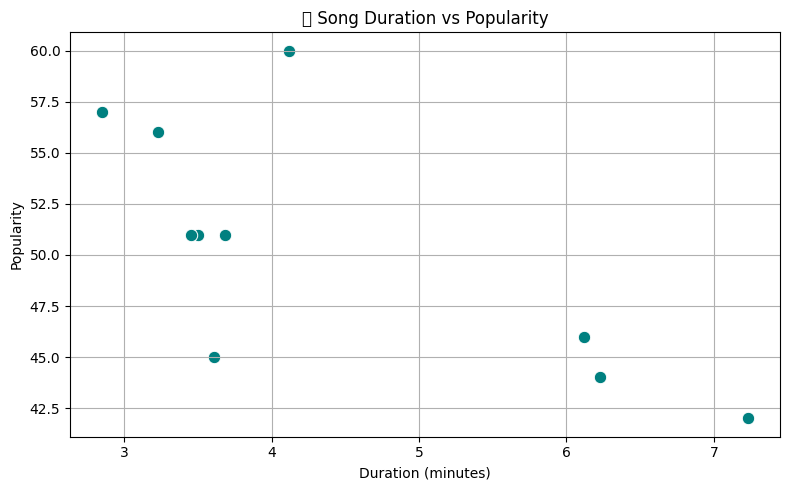

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Duration (min)", y="Popularity", s=80, color="teal")

plt.title("🎧 Song Duration vs Popularity")
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.grid(True)
plt.tight_layout()
plt.show()
